### 5시간동안 시행착오 겪은 내용정리 
1. array를 정리할땐 np.append를 쓰자.
   
2. linear model에서 **scale을** 신경쓰는 이유가 있었다. gradient descent 시간 + 성능에 영향을 크게 미친다.
3. array가 중요하다. shape도 생각하고 shape를 어떻게 다뤄야할지도 계속 연습해야한다.
4. gradient descent는 theta를 구하기 위한 식일 뿐이다. gradient 식을 가지고 gradient descent plot을 그릴 순 없다. 
5. gradient descent를 그리기 위해서는 먼저 최적의 Weight을 찾아야한다. 그 다음 mse를 계산하는 해서 plot을 만든다.
6. contour plot에서 z는 x*y 크기의 행렬이어야 한다. 격자별로 mse를 올려놓고 비슷한 부분을 등고선으로 연결시키는 개념이다.

### 배운 매소드
* array.size : vector 개수를 알려줌  axb= size

* array.flatten  : 행렬을 그냥 하나의 array로 만듬(scalar로 만드는건가? 방향이 없으니까)
* np.append(쌓일 array, 쌓을 array, 쌓을 위치(axis=0 row, axis-1 column))
* min(list) : list 최솟값 구하기
* list.index(조건) => 위치 반환
* array는 slice를 사용하면 원하는데로 조절하기 편함



In [1]:
### 등고선으로 gradient descent 그려보기

from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loans_df = pd.read_csv('D:\git_local_repository\yangoos57\DA\data/loans.csv')
loans_df.eval('credit_util = total_credit_utilized / total_credit_limit ', inplace=True)

### ch9에서 활용하는 column만 추출
intro_data = loans_df[['interest_rate','verified_income','credit_util', 'total_credit_utilized', 'public_record_bankrupt','term','issue_month','inquiries_last_12m']]
intro_data.dropna(inplace=True) # 결측값 있는 row 제거

# loans_df.loc[1]
intro_data.reset_index(drop=True,inplace=True) # index 
intro_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   interest_rate           9998 non-null   float64
 1   verified_income         9998 non-null   object 
 2   credit_util             9998 non-null   float64
 3   total_credit_utilized   9998 non-null   int64  
 4   public_record_bankrupt  9998 non-null   int64  
 5   term                    9998 non-null   int64  
 6   issue_month             9998 non-null   object 
 7   inquiries_last_12m      9998 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 625.0+ KB


<ipython-input-2-0b7c4e71f1b9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intro_data.dropna(inplace=True) # 결측값 있는 row 제거


In [3]:
# Preprocessing 필수!
from sklearn.preprocessing import StandardScaler
x_b = intro_data[['term','credit_util']]
y = intro_data[['interest_rate']]
scaler = StandardScaler()
x_b = pd.DataFrame(scaler.fit_transform(x_b)) # (9974,2)

# 굳이 안구해도 되는데 GD는 어떻게 x_0을 구하는지 궁금했음
x_b.insert(loc=0, column='x_0',value=1) # x_0 구하기 위한 열추가 (9974,3) 

# print(x_b.describe(),y.describe())

**Equation 1** : Gradient vector of the cost function

 $\nabla_{\theta}MSE(\theta) = \frac{2}{m}X^T(X\theta-y)$

**Equation 2** : Gradient Descent Step  

 $\theta^{(next\;step)}= \theta - \eta\nabla_{\theta}MSE(\theta)$

**Equation 3** : Mean Squared Error

  $ MSE(X,h_{\theta}) = \frac{1}{m}\sum_{i=1}^{m}{(\theta^Tx^{(i)}-y^{(i)})^2} $

**equation 4** : partial derivate of cost function

$\frac{\delta}{\delta\theta_j}MSE(\theta)$  = $\frac{2}{m}\sum_{i=1}^{m}{(\theta^Tx^{(i)}-y^{(i)})x_j^{(i)}}$


<img src='data/74759a1309f51c240d0f7a0ff7d39d87.webp' style='width : 300px; height :200px'>


1. $\large x_j^i$ = 행렬 $(i,j)$의 값  ex ) $\large x_1^2$ = 행렬 $(2,1)$ 값
2. $\large x^i$ = i 번째 행 ex) $\large x^1$  = 1번째 행
3. $(\theta^Tx^{(i)}-y^{(i)})$ = sample 하나의 residual(=$\hat{y}-y$) 
4. $(\theta^Tx^{(i)}-y^{(i)})x_j^{(i)}$ = residual * (j번째 있는 column 값) ex) 예시에서는 j가 3임
5. j번째 있는 column 값을 한데 모아 더한 뒤 $\frac{2}{m}$으로 나눔. 즉 9974개를 구해서 더한 뒤 $\frac{2}{9974}$으로 나눔
6. j번째 column의 $\theta$ 값 구함.
7. equation 1은 이를 한 번에 쉽게 구한 값임

8. $MSE =(X, h_θ) = \frac{1}{m}∑_{i = 1}^m{(θ^Tx^{(i)} − y^{(i)})^2}$
   

<br>
<br>
공부하자

$\large ⟨u,v⟩=u⋅v=u^1v^1+u^2v^2+⋯+u^nv^n$

$\large u⋅v=u^Tv = v^Tu = v⋅u$





조건 
1. 우선 두 벡터의 차원(길이)이 같아야 한다.

2. 앞의 벡터가 행 벡터이고 뒤의 벡터가 열 벡터여야 한다.

<br>


In [4]:
x_b # (9974,3)
y # (9974,1)
theta = np.array([[15],
                   [2],
                   [1.5]]) # (3,1)

# eta = 0.1  # learning rate
# n_iterations = 100 # 반복횟수
m = 9974 # instance 개수


### Equation 1 : gradient vector of cost function
gradients = 2/m * x_b.T.dot(x_b.dot(theta).values - y.values) # (3,9974) * [(9974,3)*(3,1) - (9974,1)] = (3,1)

### Equation 4 : partial derivate of cost function
vector_gradient = [] # j = 3개임 (3,1) 
for j in range(3) :
   storage =[]
   for i in range(m) : 
       a = (theta.T.dot(x_b.iloc[i]) -y.iloc[i].values) * x_b.iloc[i,j] # [(1,3) * (3,1) - (1,1)] = (1,1) 
       storage.append(a[0]) # j열 9974개 저장
   partial_vector = (2/m)*np.sum(storage) # equation 4
   vector_gradient.append(partial_vector) # j개 theta 구함. 


print(f'equation_1 : {gradients}') # equation 1로 구한 값
print(f'equation_4 : {vector_gradient}') # equation 4로 구한 값


equation_1 :             0
x_0  5.159134
0    0.294823
1    0.298964
equation_4 : [5.142452300393167, 0.293159197633841, 0.29087221987307543]


### 그래프 그리기

In [36]:

# 최적 weight 구하기



theta = np.array([[15],[2],[1.5]]) # (3,1)

eta = 0.1  # learning rate
n_iterations = 100 # 반복횟수
m = 9974 # instance 개수

theta_np =np.empty((1,3))
mse_list =[]
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta).values - y.values) # equation 1 행렬 크기 생각하기 (3,9974) * [(9974,3)*(3,1) - (9974,1)]
    theta = theta - eta * gradients
    theta_np = np.append(theta_np, theta.values.T,axis=0,) # equation 2 
    mse = (1/m)*np.sum(np.square(x_b.dot(theta).values - y.values)) # equation 3 (9974,3)*(3,1) - (9974,1)
    mse_list.append(mse)
    # print(gradients)

num = mse_list.index(min(mse_list)) # mse 가장 낮은 값 찾기

print(f'최적 w : {theta_np[1:][num]} , {num+1}') 



최적 w : [12.42662533  1.84689713  1.34490921] , 96


In [37]:
# plot 그리기 위한 단계

n_r = 10 # 범위 설정
x_lin = np.linspace(-theta_np[1:][num][1]*n_r ,theta_np[1:][num][1]*n_r, 200) # 최적 w_0기준으로 +- 10배 범위 생성, 200개 생성
y_lin = np.linspace(-theta_np[1:][num][2]*n_r ,theta_np[1:][num][2]*n_r, 200) # 최적 w_1기준으로 +- 10배 범위 생성, 200개 생성
z_lin = np.zeros((x_lin.size,y_lin.size)) # (200,200) 격자 만들기

## 격자에 개별 MSE 채우기
drop_x_1 = x_b.drop(columns='x_0')
for i, value1 in enumerate(x_lin):
    for j, value2 in enumerate(y_lin):
        w_temp = np.array((value1,value2)).reshape(2,1)        
        z_lin[i, j] = (1/m)*np.sum(np.square(drop_x_1.dot(w_temp).values - y.values)) #mse 공식

Text(0, 0.5, 'w1')

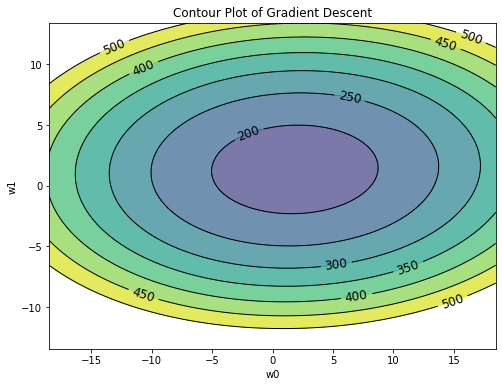

In [38]:
# plt.contourf(x_lin,y_lin,z_lin)
level = [100,150,200,250,300,350,400,450,500] # 표시할 등고선 범위(최솟값을 지외하고 설정한 기준에 맞게 그려준다.)
plt.figure(figsize=(8,6))
plt.contourf(x_lin,y_lin,z_lin,levels=level,alpha=0.7) # 색만 칠하기
CS = plt.contour(x_lin,y_lin,z_lin,levels=level,linewidths=1,colors='black') # 등고선만 그리기
plt.clabel(CS, inline=1, fontsize=12,fmt='%d') # 등고선에 text 넣기
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("w0")
plt.ylabel("w1")

